**For Red Wine Data**

In [ ]:
# importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

Data taken from the Wine Quality Data Set at UCI ML repo https://archive.ics.uci.edu/ml/datasets/Wine+Quality   
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.   
  Modeling wine preferences by data mining from physicochemical properties.  
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.


In [ ]:
#downloading red wine quality data 
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data_red= pd.read_csv(file_path, delimiter = ";")

In [ ]:
display(data_red)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

In [ ]:
#@title Default title text
#cheking if there is any null entry
data_red.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

**Observations**
1. None of the entries are null so we don't need to remove any entry.

In [ ]:
#@title Default title text
# checking data type and no. of unique values in each column
for col in data_red.columns.values:
  list_vals = pd.unique(data_red[col])
  print(col, ", type:", data_red[col].dtypes, ", unique values:", len(list_vals))
      

fixed acidity , type: float64 , unique values: 96
volatile acidity , type: float64 , unique values: 143
citric acid , type: float64 , unique values: 80
residual sugar , type: float64 , unique values: 91
chlorides , type: float64 , unique values: 153
free sulfur dioxide , type: float64 , unique values: 60
total sulfur dioxide , type: float64 , unique values: 144
density , type: float64 , unique values: 436
pH , type: float64 , unique values: 89
sulphates , type: float64 , unique values: 96
alcohol , type: float64 , unique values: 65
quality , type: int64 , unique values: 6


**Observation**
1. Every feature has many discrete values so they can be treated as continuous variables.

In [ ]:
#@title Default title text
#summary of data for each column
data_red.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

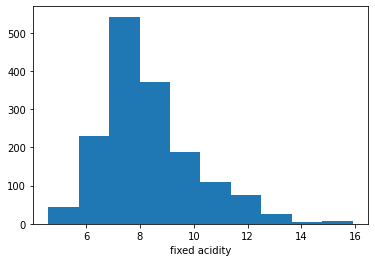

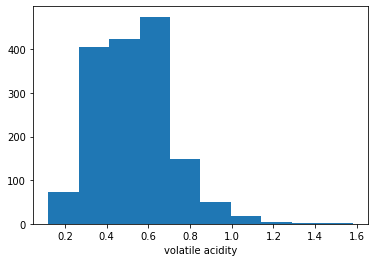

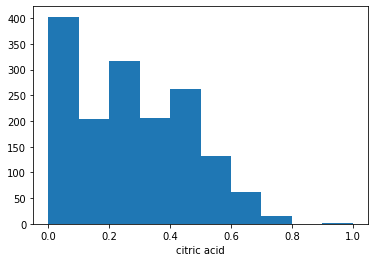

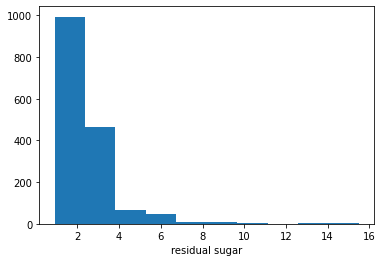

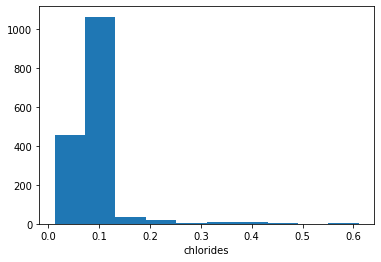

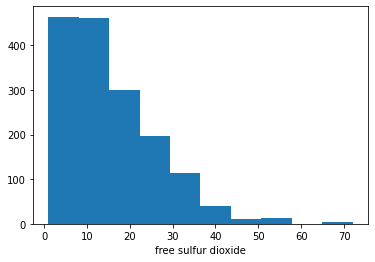

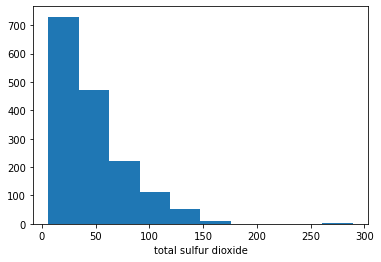

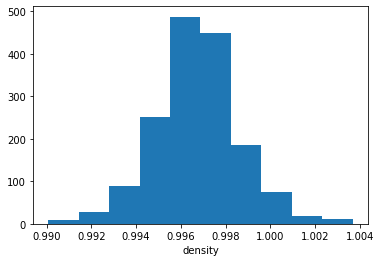

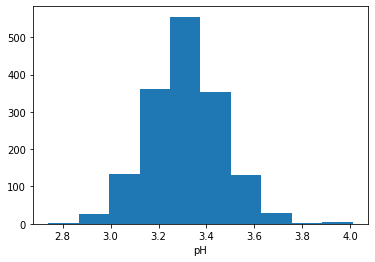

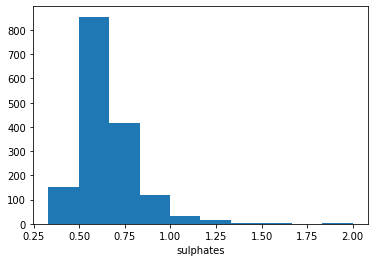

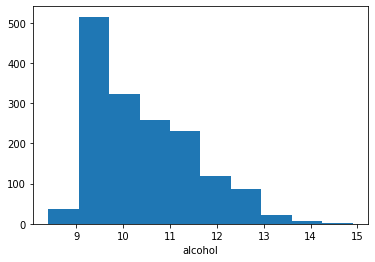

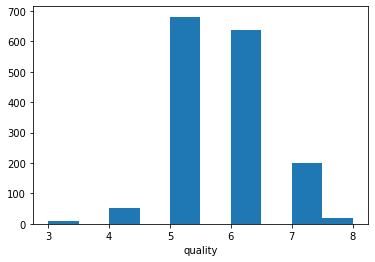

In [ ]:
#@title Default title text
#histogram of values in each feature
for col in data_red.columns.values:
  plt.hist(data_red[col])
  plt.xlabel(col)
  plt.show()

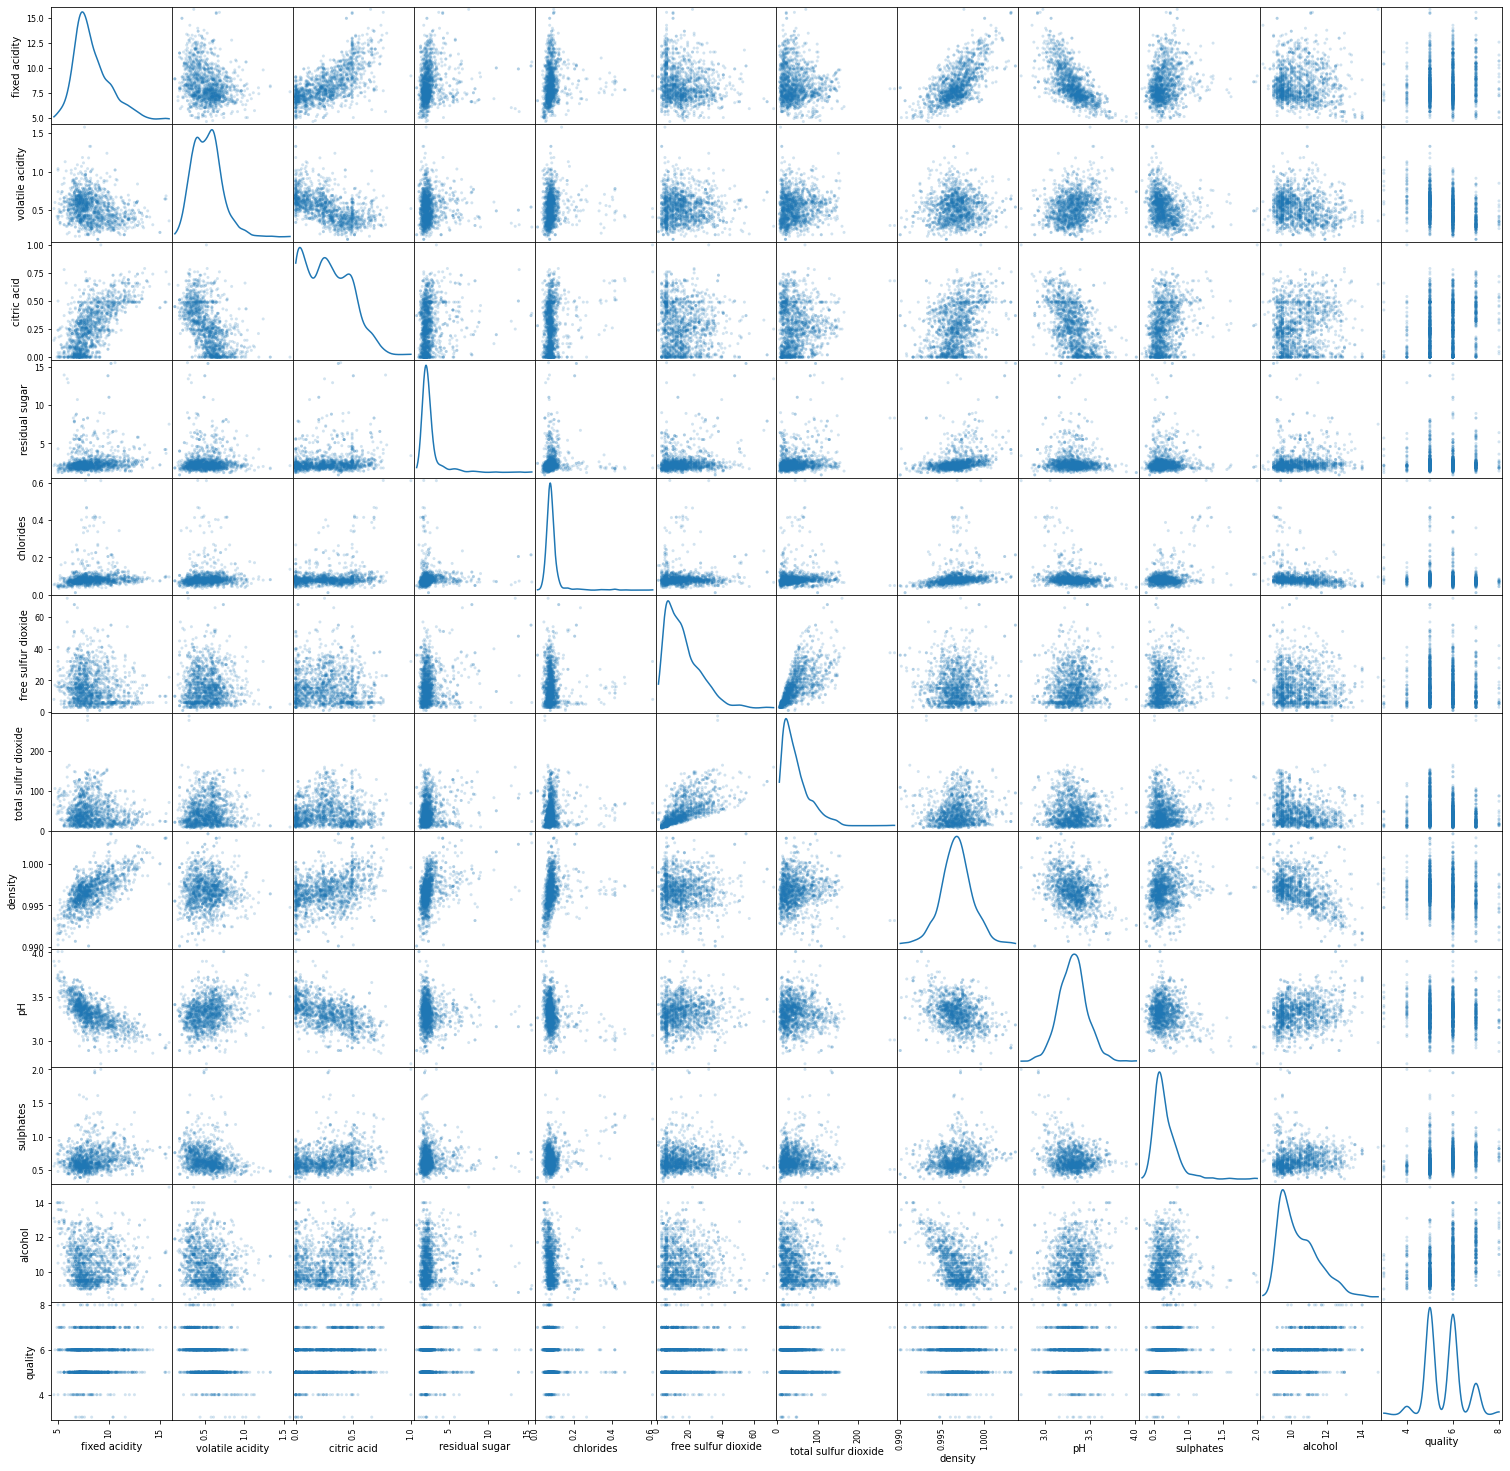

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_red, alpha = 0.2, figsize = (26, 26), diagonal = "kde")
plt.show()

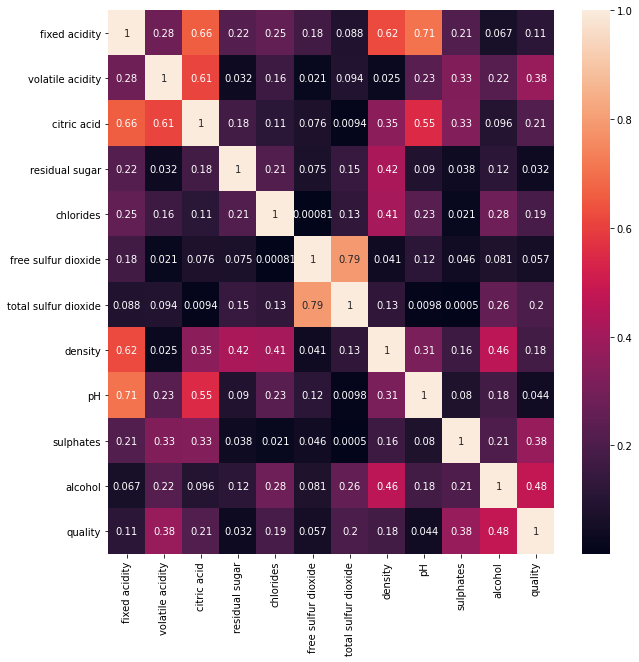

In [ ]:
#@title Default title text
corr_matrix = data_red.corr(method = "spearman") #spearman for non linear
#print(corrMatrix)

fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(abs(corr_matrix), annot = True)
plt.show()

**Observations**
1. None of the two features are highly correlated so we don't need to discard any feature.

In [ ]:
#preprocessing
scaler = preprocessing.StandardScaler()
y_red = data_red.quality
X_red = data_red.drop('quality', axis=1)

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red,y_red,test_size = 0.2, random_state = 0)

scaler.fit(X_train_red)
X_train_red = scaler.transform(X_train_red)
X_test_red = scaler.transform(X_test_red)

In [ ]:
#lasso regression 

hyperparameters = {'alpha':[0.001,0.002,0.005,0.01, 0.02, 0.05]}

lasso_red = GridSearchCV(estimator=Lasso(), param_grid =hyperparameters,cv=10)
lasso_red.fit(np.array(X_train_red), np.squeeze(y_train_red))

print(lasso_red.best_params_)
     

{'alpha': 0.01}


In [ ]:
lasso_model_red = Lasso(alpha = 0.01).fit(X_train_red, y_train_red)

print("training score:",lasso_model_red.score(X_train_red, y_train_red ))
print("test score:", lasso_model_red.score(np.array(X_test_red), np.array(y_test_red)))

print(lasso_model_red.coef_)

training score: 0.36215195064153505
test score: 0.3266988414796749
[ 0.00490604 -0.20218274 -0.          0.01003128 -0.08048025  0.0049064
 -0.07062818 -0.         -0.04387777  0.13915534  0.30550003]


**Observation:**Number of features eliminated are 2

In [ ]:
# random forest
pipeline = make_pipeline(RandomForestRegressor(n_estimators=100))

hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

rf_red = GridSearchCV(pipeline, hyperparameters, cv=10)
rf_red.fit(np.array(X_train_red), np.array(y_train_red))
print(rf_red.best_params_)


{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'log2'}


In [ ]:
rf_red = RandomForestRegressor(max_depth=None, max_features='log2')
rf_red.fit(X_train_red, y_train_red)
y_pred_red = rf_red.predict(X_test_red)
print('Test Accuracy score :',accuracy_score(y_test_red,y_pred_red.round()))


Test Accuracy score : 0.703125


In [ ]:
#support vector 
svc = GridSearchCV(SVC(),{'kernel':['rbf','linear'], 'C' : [.01,.1,1,10], 'gamma' : [.001,.01,.1]})
svc.fit(X_train_red,y_train_red)

print(svc.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
svc_red = SVC(C=10, gamma = 0.1, kernel = 'rbf')
svc_red.fit(X_train_red, y_train_red)

y_pred_red = svc_red.predict(X_test_red)
print('Test Accuracy score :',accuracy_score(y_test_red,y_pred_red.round()))


Test Accuracy score : 0.64375


**For white wine data**

In [ ]:
#downloading white wine quality data 
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data_white = pd.read_csv(file_path, delimiter = ";")

In [ ]:
display(data_white)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.0              0.27         0.36  ...       0.45      8.8        6
1               6.3              0.30         0.34  ...       0.49      9.5        6
2               8.1              0.28         0.40  ...       0.44     10.1        6
3               7.2              0.23         0.32  ...       0.40      9.9        6
4               7.2              0.23         0.32  ...       0.40      9.9        6
...             ...               ...          ...  ...        ...      ...      ...
4893            6.2              0.21         0.29  ...       0.50     11.2        6
4894            6.6              0.32         0.36  ...       0.46      9.6        5
4895            6.5              0.24         0.19  ...       0.46      9.4        6
4896            5.5              0.29         0.30  ...       0.38     12.8        7
4897            6.0              0.21         0.38  ...       0.32     11.8        6

[4898 rows x 12 columns]

In [ ]:
#cheking if there is any null entry
data_white.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
# checking data type and no. of unique values in each column
for col in data_white.columns.values:
  list_vals = pd.unique(data_white[col])
  print(col, ", type:", data_white[col].dtypes, ", unique values:", len(list_vals))

fixed acidity , type: float64 , unique values: 68
volatile acidity , type: float64 , unique values: 125
citric acid , type: float64 , unique values: 87
residual sugar , type: float64 , unique values: 310
chlorides , type: float64 , unique values: 160
free sulfur dioxide , type: float64 , unique values: 132
total sulfur dioxide , type: float64 , unique values: 251
density , type: float64 , unique values: 890
pH , type: float64 , unique values: 103
sulphates , type: float64 , unique values: 79
alcohol , type: float64 , unique values: 103
quality , type: int64 , unique values: 7


In [ ]:
#summary of data for each column
data_white.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    4898.000000       4898.000000  ...  4898.000000  4898.000000
mean        6.854788          0.278241  ...    10.514267     5.877909
std         0.843868          0.100795  ...     1.230621     0.885639
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.300000          0.210000  ...     9.500000     5.000000
50%         6.800000          0.260000  ...    10.400000     6.000000
75%         7.300000          0.320000  ...    11.400000     6.000000
max        14.200000          1.100000  ...    14.200000     9.000000

[8 rows x 12 columns]

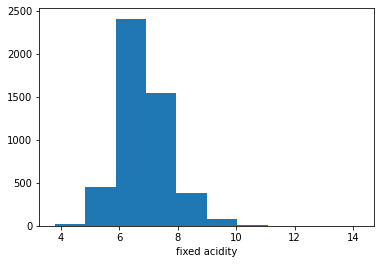

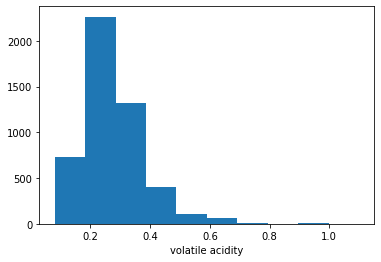

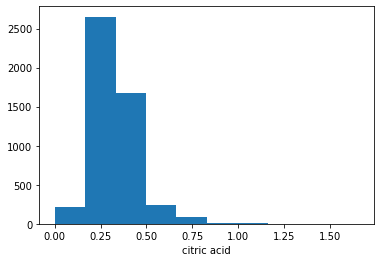

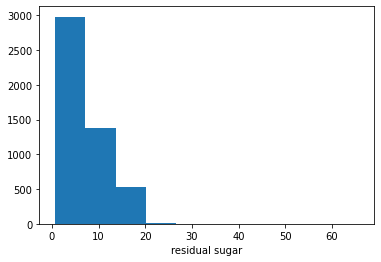

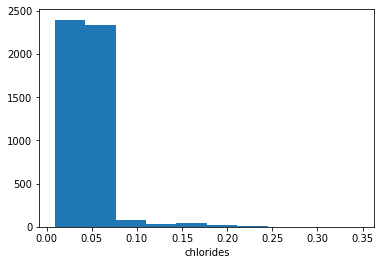

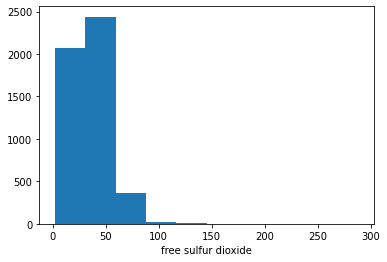

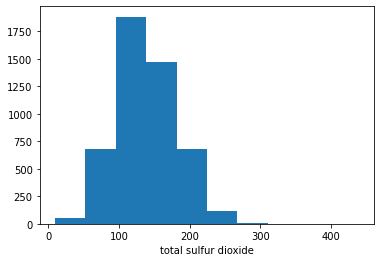

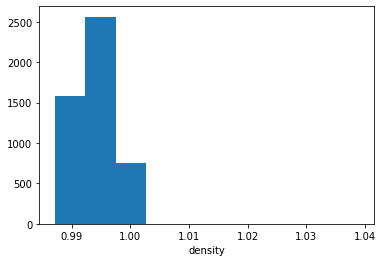

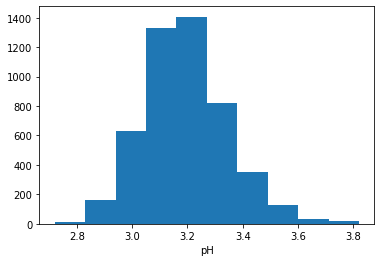

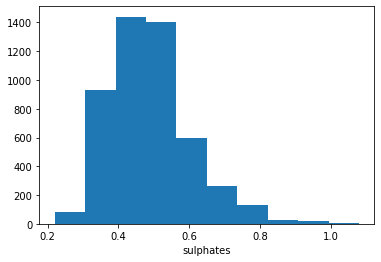

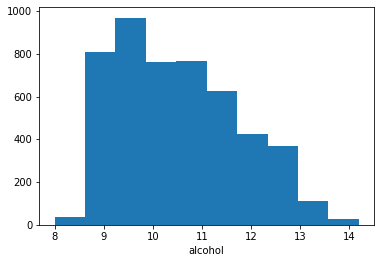

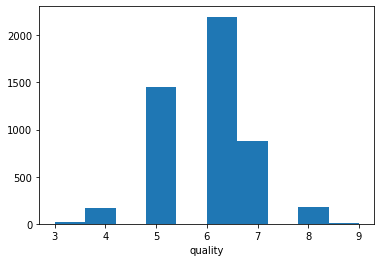

In [ ]:
#@title Default title text
#histogram of values in each feature
for col in data_white.columns.values:
  plt.hist(data_white[col])
  plt.xlabel(col)
  plt.show()

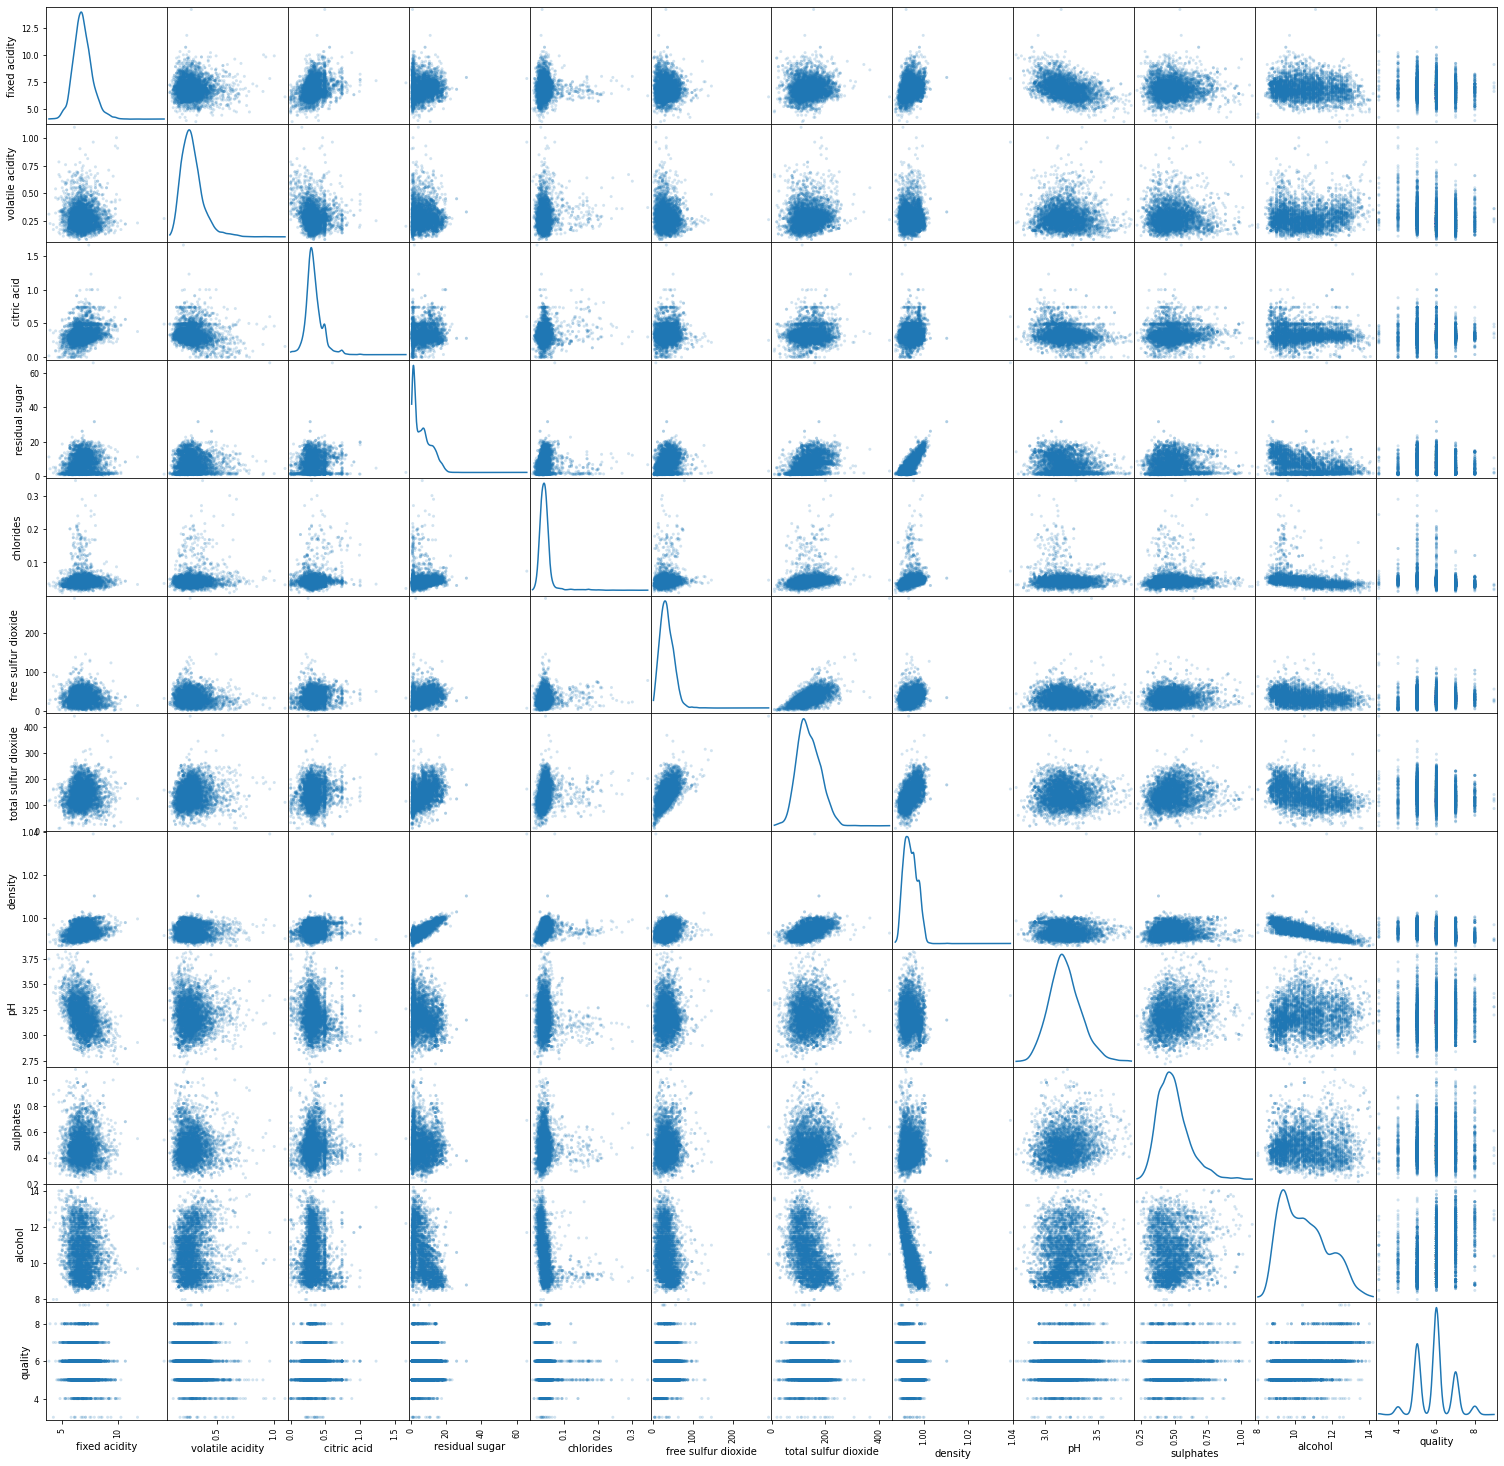

In [ ]:
#@title Default title text
from pandas.plotting import scatter_matrix
scatter_matrix(data_white, alpha = 0.2, figsize = (26, 26), diagonal = "kde")
plt.show()

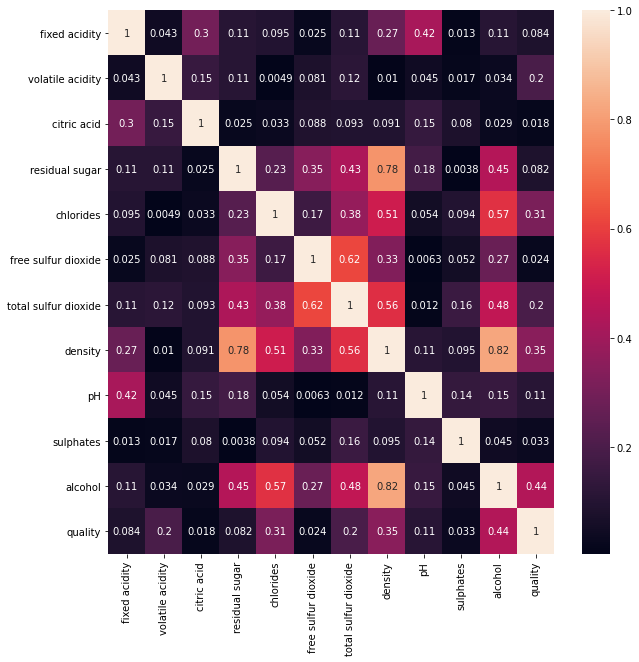

In [ ]:
#@title Default title text
corr_matrix = data_white.corr(method = "spearman") #spearman for non linear
#print(corrMatrix)

fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(abs(corr_matrix), annot = True)
plt.show()

**Observations**
1. None of the two features are highly correlated so we don't need to discard any feature.

In [ ]:
#preprocessing
scaler = preprocessing.StandardScaler()
y_white = data_white.quality
X_white = data_white.drop('quality', axis=1)

X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white,y_white,test_size = 0.2, random_state = 0)

scaler.fit(X_train_red)
X_train_white = scaler.transform(X_train_white)
X_test_white = scaler.transform(X_test_white)

In [ ]:
#lasso regression 

hyperparameters = {'alpha':[0.001,0.002,0.005,0.01, 0.02, 0.05]}

lasso_white = GridSearchCV(estimator=Lasso(), param_grid =hyperparameters,cv=10)
lasso_white.fit(np.array(X_train_white), np.squeeze(y_train_white))

print(lasso_white.best_params_)

{'alpha': 0.001}


In [ ]:
lasso_model_white = Lasso(alpha = 0.001).fit(X_train_white, y_train_white)

print("training score:",lasso_model_white.score(X_train_white, y_train_white ))
print("test score:", lasso_model_white.score(np.array(X_test_white), np.array(y_test_white)))

print(lasso_model_white.coef_)

training score: 0.27702635378565077
test score: 0.24784279592194414
[-4.09707218e-02 -1.78403301e+00 -0.00000000e+00  2.54213981e-02
 -0.00000000e+00  5.70762822e-03 -1.18011882e-03 -0.00000000e+00
  1.72212350e-01  3.10639004e-01  3.62588155e-01]


**Observation:**
Number of features eliminated = 3

In [ ]:
# random forest
pipeline = make_pipeline(RandomForestRegressor(n_estimators=100))

hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

rf_white = GridSearchCV(pipeline, hyperparameters, cv=10)
rf_white.fit(np.array(X_train_white), np.array(y_train_white))
print(rf_white.best_params_)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'log2'}


In [ ]:
rf_white = RandomForestRegressor(max_depth=None, max_features='log2')
rf_white.fit(X_train_white, y_train_white)
y_pred_white = rf_white.predict(X_test_white)
print('Test Accuracy score :',accuracy_score(y_test_white,y_pred_white.round()))


Test Accuracy score : 0.636734693877551


In [ ]:
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white,y_white,test_size = 0.2, random_state = 0)

scaler.fit(X_train_white)
X_train_white = scaler.transform(X_train_white)
X_test_white = scaler.transform(X_test_white)

In [ ]:
#support vector 
svc = GridSearchCV(SVC(),{'kernel':['rbf','linear'], 'C' : [.01,.1,1,10], 'gamma' : [.001,.01,.1]})
svc.fit(X_train_white,y_train_white)

print(svc.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
svc_white = SVC(C=10, gamma = 0.1, kernel = 'rbf')
svc_white.fit(X_train_white, y_train_white)

y_pred_white = svc_white.predict(X_test_white)
print('Test Accuracy score :',accuracy_score(y_test_white,y_pred_white.round()))

Test Accuracy score : 0.5693877551020409


**Using models of red wine to predict quality of white wine and vice versa.**

In [ ]:
#lasso model red for white wine data
print("test score:", lasso_model_red.score(np.array(X_test_white), np.array(y_test_white)))


test score: 0.16577031963749897


In [ ]:
#lasso model white for red wine data
print("test score:", lasso_model_white.score(np.array(X_test_red), np.array(y_test_red)))

test score: -25.307143908864873


In [ ]:
#random forrest model red for white wine data
y_pred_white = rf_red.predict(X_test_white)
print('Test Accuracy score :',accuracy_score(y_test_white,y_pred_white.round()))

Test Accuracy score : 0.4663265306122449


In [ ]:
#random forrest model white for red wine data
y_pred_red = rf_white.predict(X_test_red)
print('Test Accuracy score :',accuracy_score(y_test_red,y_pred_red.round()))

Test Accuracy score : 0.46875


In [ ]:
#svc model red for predicting white data
y_pred_white = svc_red.predict(X_test_white)
print('Test Accuracy score :',accuracy_score(y_test_white,y_pred_white.round()))

Test Accuracy score : 0.4346938775510204


In [ ]:
#svc model white for predicting red data
y_pred_red = svc_white.predict(X_test_red)
print('Test Accuracy score :',accuracy_score(y_test_red,y_pred_red.round()))

Test Accuracy score : 0.509375


By comparing the above cross model scores with same model scores we can see that the cross model scores are pretty less in each case, so using the cross models for predicting data is not a good idea.